# Regressão com Dataset de Predição de Enchentes

## Importar bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import numpy as np
import seaborn as sns

## Importar Dataset - Treino

In [2]:
train_data = pd.read_csv('/kaggle/input/playground-series-s4e5/train.csv')
train_data.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [3]:
train_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [4]:
target = train_data['FloodProbability']
train_data = train_data.drop('FloodProbability', axis = 1)
train_data.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors'],
      dtype='object')

In [5]:
pd.DataFrame(target)

,FloodProbability
0,0.445
1,0.450
2,0.530
3,0.535
4,0.415
...,...
1117952,0.495
1117953,0.480
1117954,0.485
1117955,0.495


In [6]:
for column in train_data.columns:
    print(f"{column:>12}: {len(set(train_data[column])):4} {train_data[column].dtypes}")

          id: 1117957 int64
MonsoonIntensity:   17 int64
TopographyDrainage:   19 int64
RiverManagement:   17 int64
Deforestation:   18 int64
Urbanization:   18 int64
ClimateChange:   18 int64
 DamsQuality:   17 int64
   Siltation:   17 int64
AgriculturalPractices:   17 int64
Encroachments:   19 int64
IneffectiveDisasterPreparedness:   17 int64
DrainageSystems:   18 int64
CoastalVulnerability:   18 int64
  Landslides:   17 int64
  Watersheds:   17 int64
DeterioratingInfrastructure:   18 int64
PopulationScore:   19 int64
 WetlandLoss:   20 int64
InadequatePlanning:   17 int64
PoliticalFactors:   17 int64


In [7]:
for column in train_data.columns:
    print(f"{column:>12}: {(train_data[column]<0).sum()}" )

          id: 0
MonsoonIntensity: 0
TopographyDrainage: 0
RiverManagement: 0
Deforestation: 0
Urbanization: 0
ClimateChange: 0
 DamsQuality: 0
   Siltation: 0
AgriculturalPractices: 0
Encroachments: 0
IneffectiveDisasterPreparedness: 0
DrainageSystems: 0
CoastalVulnerability: 0
  Landslides: 0
  Watersheds: 0
DeterioratingInfrastructure: 0
PopulationScore: 0
 WetlandLoss: 0
InadequatePlanning: 0
PoliticalFactors: 0


In [8]:
train_data.describe().astype(int)

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
count,1117957,1117957,1117957,1117957,1117957,1117957,1117957,1117957,1117957,1117957,...,1117957,1117957,1117957,1117957,1117957,1117957,1117957,1117957,1117957,1117957
mean,558978,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
std,322726,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
min,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25%,279489,3,3,4,4,3,3,4,3,3,...,3,4,3,3,3,3,3,4,3,3
50%,558978,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
75%,838467,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
max,1117956,16,18,16,17,17,17,16,16,16,...,16,17,17,16,16,17,18,19,16,16


In [9]:
train_data = train_data.drop('id', axis =1)
train_data.columns

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors'],
      dtype='object')

In [10]:
correlation_matrix = train_data.corr().abs()

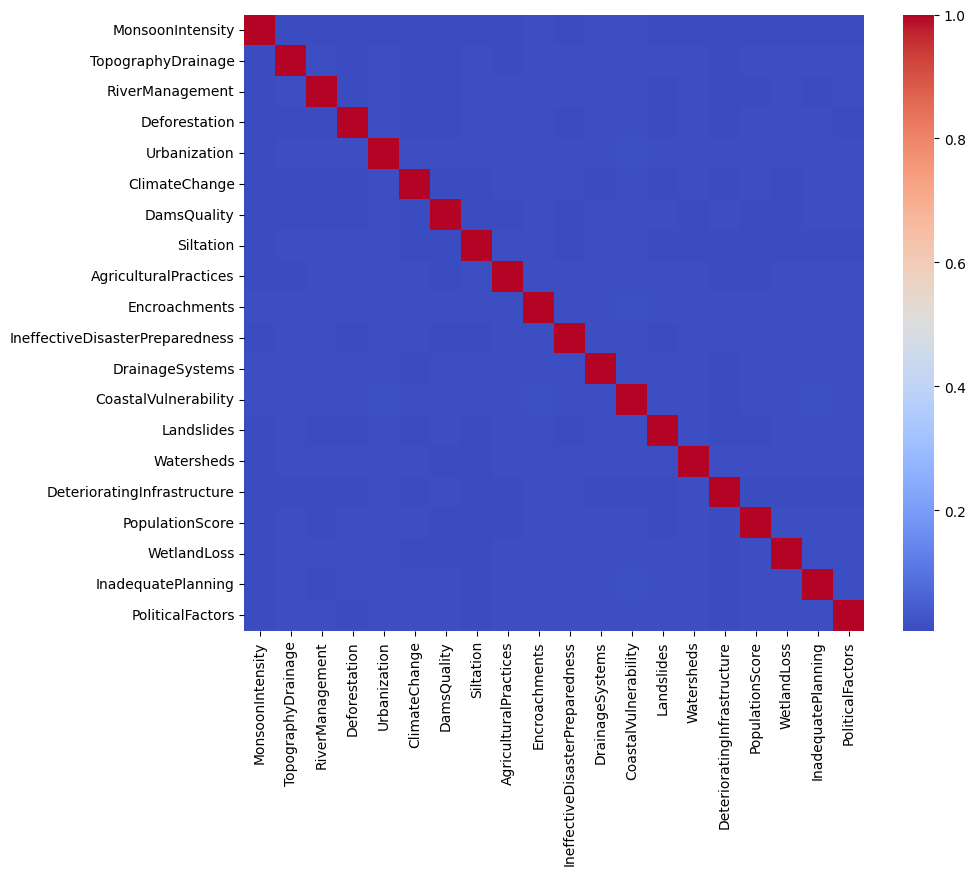

In [11]:
# Plotar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.show()

In [12]:
# Threshold para alta correlação
threshold = 0.016

# Encontrar pares de variáveis com correlação acima do threshold
high_corr_var = np.where(correlation_matrix > threshold)
high_corr_var = [(correlation_matrix.index[x], correlation_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]

print("Pares de variáveis com alta correlação: ", high_corr_var)

Pares de variáveis com alta correlação:  [('Encroachments', 'CoastalVulnerability')]


In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcular o VIF para cada variável
vif_data = pd.DataFrame()
vif_data["feature"] = train_data.columns
vif_data["VIF"] = [variance_inflation_factor(train_data.values, i) for i in range(len(train_data.columns))]

print(vif_data)

                            feature       VIF
0                  MonsoonIntensity  6.349246
1                TopographyDrainage  6.159558
2                   RiverManagement  6.324199
3                     Deforestation  6.394476
4                      Urbanization  6.224002
5                     ClimateChange  6.349845
6                       DamsQuality  6.272941
7                         Siltation  6.302420
8             AgriculturalPractices  6.309956
9                     Encroachments  6.233138
10  IneffectiveDisasterPreparedness  6.264557
11                  DrainageSystems  6.287535
12             CoastalVulnerability  6.209125
13                       Landslides  6.241918
14                       Watersheds  6.206214
15      DeterioratingInfrastructure  6.316514
16                  PopulationScore  6.252646
17                      WetlandLoss  6.326189
18               InadequatePlanning  6.237662
19                 PoliticalFactors  6.187259


## Importar Dataset - Teste

In [14]:
test_data = pd.read_csv('/kaggle/input/playground-series-s4e5/test.csv')
test_data.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5


In [15]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745305 entries, 0 to 745304
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   id                               745305 non-null  int64
 1   MonsoonIntensity                 745305 non-null  int64
 2   TopographyDrainage               745305 non-null  int64
 3   RiverManagement                  745305 non-null  int64
 4   Deforestation                    745305 non-null  int64
 5   Urbanization                     745305 non-null  int64
 6   ClimateChange                    745305 non-null  int64
 7   DamsQuality                      745305 non-null  int64
 8   Siltation                        745305 non-null  int64
 9   AgriculturalPractices            745305 non-null  int64
 10  Encroachments                    745305 non-null  int64
 11  IneffectiveDisasterPreparedness  745305 non-null  int64
 12  DrainageSystems               

In [16]:
test_ids = test_data['id']
test_data = test_data.drop('id', axis =1)
test_data.columns

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors'],
      dtype='object')

## Treinar Modelo - Regressão Linear

In [17]:
from sklearn.decomposition import PCA

# Pipeline com polinômio e regressão linear
pipeline = Pipeline([
    ('pca', PCA(n_components=0.99)),
    ('scaler', MinMaxScaler(feature_range=(0, 1))),
    ('regressor', Ridge(alpha = 1.0))
])

scores = cross_val_score(pipeline, train_data, target, cv=8, scoring='r2')
print("R² Médio (Cross-Validation):", np.mean(scores))

# Treinamento no conjunto completo de treinamento
pipeline.fit(train_data, target)

R² Médio (Cross-Validation): 0.8449376999042004


Pipeline(steps=[('pca', PCA(n_components=0.99)), ('scaler', MinMaxScaler()),
                ('regressor', Ridge())])

## Grid-Search

In [18]:
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

def use_grid_search(pipeline, param_grid, train_data, target):
    # Lista de diferentes números de folds para validação cruzada
    cv_folds = [5,6,7,8,9,10]

    # Variável para armazenar os melhores resultados
    best_params = None
    best_score = -np.inf

    # Loop para testar diferentes números de folds
    for cv in tqdm(cv_folds):
        # Define o GridSearchCV com o número de folds atual
        grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='r2')

        # Treina o GridSearchCV
        grid_search.fit(train_data, target)

        # Verifica se a performance é melhor que a melhor performance anterior
        if grid_search.best_score_ > best_score:
            best_score = grid_search.best_score_
            best_params = grid_search.best_params_
            best_cv = cv

    # Melhor combinação de parâmetros e o número de folds correspondente
    print("Melhores parâmetros: ", best_params)
    print("Melhor número de folds: ", best_cv)
    print("Melhor score: ", best_score)

    return best_params

In [19]:
param_grid = {
    'scaler': [StandardScaler(), MinMaxScaler()], # Diferentes funções de normalização
    'pca__n_components': [0.90, 0.95, 0.99],  # Diferentes níveis de variância retida pelo PCA
    'regressor__fit_intercept': [True, False],  # Se deve ajustar o intercepto
}

In [20]:
best_params = use_grid_search(pipeline, param_grid, train_data, target)

# Treina o melhor modelo encontrado no conjunto de treinamento completo
best_model = Pipeline([
    ('scaler', best_params['scaler']),
    ('pca', PCA(n_components=best_params['pca__n_components'])),
    ('regressor', Ridge(alpha = 1.0, fit_intercept=best_params['regressor__fit_intercept']))
])

best_model.fit(train_data, target)

100%|██████████| 6/6 [13:42<00:00, 137.07s/it]


Melhores parâmetros:  {'pca__n_components': 0.99, 'regressor__fit_intercept': True, 'scaler': StandardScaler()}
Melhor número de folds:  7
Melhor score:  0.8449381305253845


Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.99)),
                ('regressor', Ridge())])

# Realizar Predição

In [22]:
from tqdm import tqdm
submission_csv = {}
submission_csv['id'] = []
submission_csv['FloodProbability'] = []

y_preds = best_model.predict(test_data)
for idx in tqdm(range(len(test_ids))):  
    submission_csv['id'].append(test_ids[idx])
    submission_csv['FloodProbability'].append(y_preds[idx])

df = pd.DataFrame(submission_csv)
df.to_csv('submission.csv', index=False)

100%|██████████| 745305/745305 [00:02<00:00, 252991.55it/s]


***RESULTADO DO R2 SCORE: 0.84***